#**2. Data Preperation**

#For Using GPU on colabs

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#Connect to drive (if dataset is stored here)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Prepare Dataset

one picture example

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
base_dir = '/content/drive/My Drive/Bin-Py/Garbage classification'
classes = ["cardboard","glass","metal","paper","plastic"]

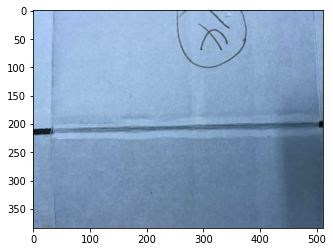

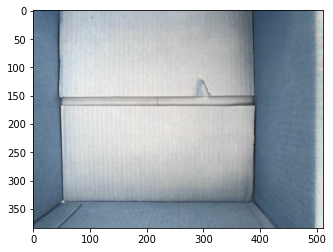

In [4]:
for c in classes:
  path=os.path.join(base_dir,c) #to attach the path of each folder
  for img in os.listdir(path): #iterate through all the images of the directory
    img_array=cv2.imread(os.path.join(path,img)) #array version of each picture
    plt.imshow(img_array)
    plt.show()
      break
  break


In [5]:
img_array.shape

(384, 512, 3)

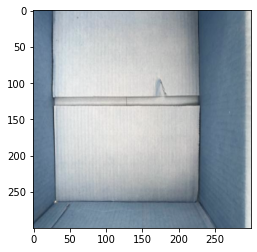

In [6]:
mod_array= np.array(cv2.resize(img_array,(300,300)))

plt.imshow(mod_array)
plt.show()

#Doing the same steps for all pictures

In [0]:
data_samples = []

def create_training_data():
  for c in classes:
    path=os.path.join(base_dir,c) #to attach the path of each folder
    class_num= classes.index(c)
    for img in os.listdir(path): #iterate through all the images of the directory
      img_array=cv2.imread(os.path.join(path,img)) #array version of each picture
      mod_array= np.array(cv2.resize(img_array,(300,300))) #resize the array to 200*200
      data_samples.append([mod_array,class_num]) 


create_training_data()


#Seperating image array and their labels

In [0]:
X=[]
y=[]

In [0]:
for feat,lab in data_samples:
  X.append(feat)
  y.append(lab)

X= np.array(X)
y= np.array(y)

#Split dataset into train and test sets

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1)

In [0]:
for train_ix, test_ix in sss.split(X,y):
    X_train = X[train_ix]
    X_test = X[test_ix]
    y_train = y[train_ix]
    y_test = y[test_ix]

In [13]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3150
350
3150
350


#Storing the Dataset

The dataset can be stored by serialising data objects using pickle library

In [0]:
import pickle 

pickle_out= open("/content/X_train.pkl","wb")
pickle.dump(X_train,pickle_out,protocol=4)
pickle_out.close()

pickle_out= open("/content/y_train.pkl","wb")
pickle.dump(y_train,pickle_out,protocol=4)
pickle_out.close()

pickle_out= open("/content/X_test.pkl","wb")
pickle.dump(X_test,pickle_out,protocol=4)
pickle_out.close()

pickle_out= open("/content/y_test.pkl","wb")
pickle.dump(y_test,pickle_out,protocol=4)
pickle_out.close()